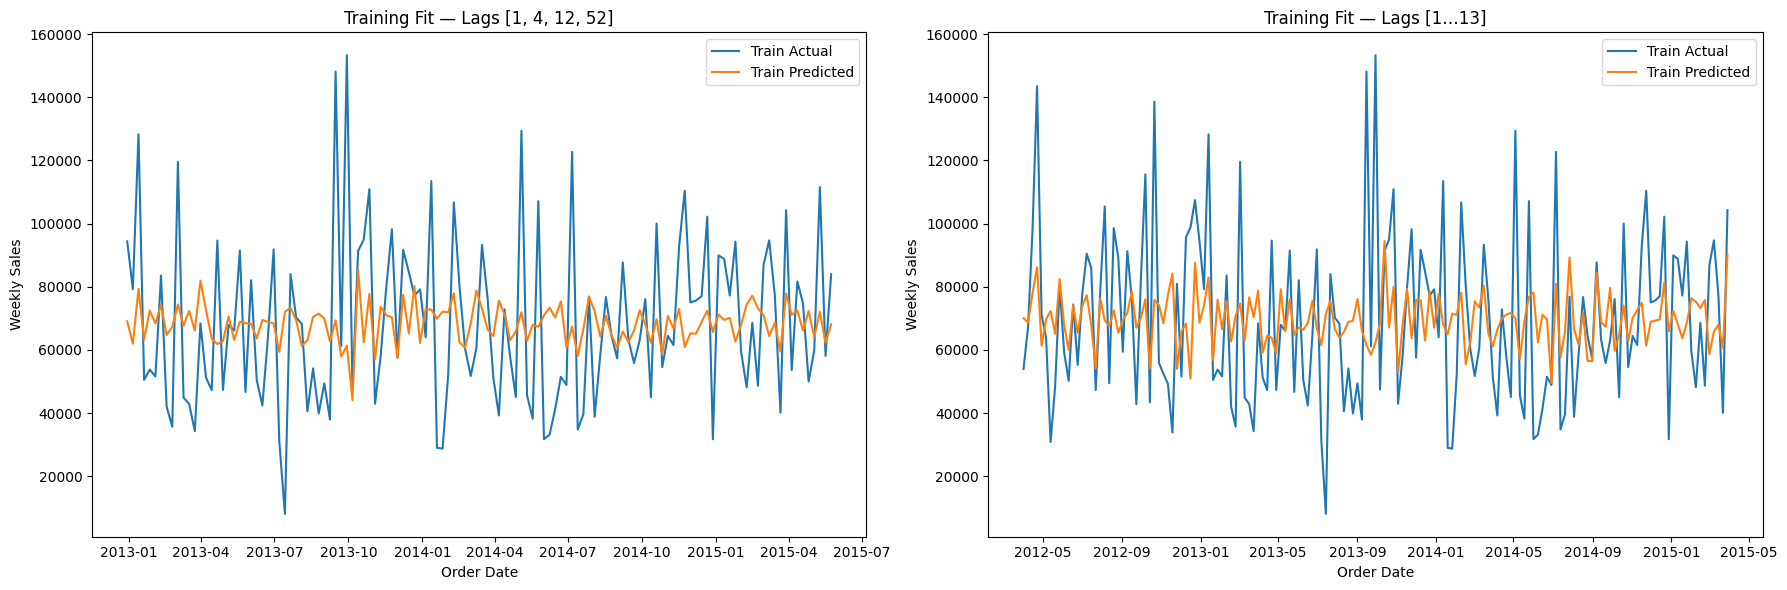

In [5]:
## Step 4 — Regression with Lag Features (Low Capacity)

# Comparison of Training set for both Dense and Spare lags

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Load data
df = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
df["Order Date"] = pd.to_datetime(df["Order Date"])


# ---------- COMMON SETUP ----------
dates = weekly_sales["Order Date"]
sales = weekly_sales["Sales"]

# ---------- MODEL 1: Sparse seasonal lags [1,4,12,52] ----------
lags_sparse = [1, 4, 12, 52]
df_sparse = weekly_sales.copy()

for lag in lags_sparse:
    df_sparse[f"lag_{lag}"] = df_sparse["Sales"].shift(lag)

df_sparse = df_sparse.dropna().reset_index(drop=True)

X_sparse = df_sparse[[f"lag_{lag}" for lag in lags_sparse]]
y_sparse = df_sparse["Sales"]
dates_sparse = df_sparse["Order Date"]

split_sparse = int(len(df_sparse) * 0.8)

X_sparse_train = X_sparse.iloc[:split_sparse]
y_sparse_train = y_sparse.iloc[:split_sparse]
dates_sparse_train = dates_sparse.iloc[:split_sparse]

model_sparse = LinearRegression()
model_sparse.fit(X_sparse_train, y_sparse_train)
y_sparse_pred = model_sparse.predict(X_sparse_train)

# ---------- MODEL 2: Dense short-memory lags [1…13] ----------
lags_dense = list(range(1, 14))
df_dense = weekly_sales.copy()

for lag in lags_dense:
    df_dense[f"lag_{lag}"] = df_dense["Sales"].shift(lag)

df_dense = df_dense.dropna().reset_index(drop=True)

X_dense = df_dense[[f"lag_{lag}" for lag in lags_dense]]
y_dense = df_dense["Sales"]
dates_dense = df_dense["Order Date"]

split_dense = int(len(df_dense) * 0.8)

X_dense_train = X_dense.iloc[:split_dense]
y_dense_train = y_dense.iloc[:split_dense]
dates_dense_train = dates_dense.iloc[:split_dense]

model_dense = LinearRegression()
model_dense.fit(X_dense_train, y_dense_train)
y_dense_pred = model_dense.predict(X_dense_train)

# ---------- SIDE-BY-SIDE TRAINING PLOTS ----------
plt.figure(figsize=(18, 6))

# Left: Sparse lags
plt.subplot(1, 2, 1)
plt.plot(dates_sparse_train, y_sparse_train, label="Train Actual")
plt.plot(dates_sparse_train, y_sparse_pred, label="Train Predicted")
plt.title("Training Fit — Lags [1, 4, 12, 52]")
plt.xlabel("Order Date")
plt.ylabel("Weekly Sales")
plt.legend()

# Right: Dense lags
plt.subplot(1, 2, 2)
plt.plot(dates_dense_train, y_dense_train, label="Train Actual")
plt.plot(dates_dense_train, y_dense_pred, label="Train Predicted")
plt.title("Training Fit — Lags [1…13]")
plt.xlabel("Order Date")
plt.ylabel("Weekly Sales")
plt.legend()

plt.tight_layout()
plt.show()



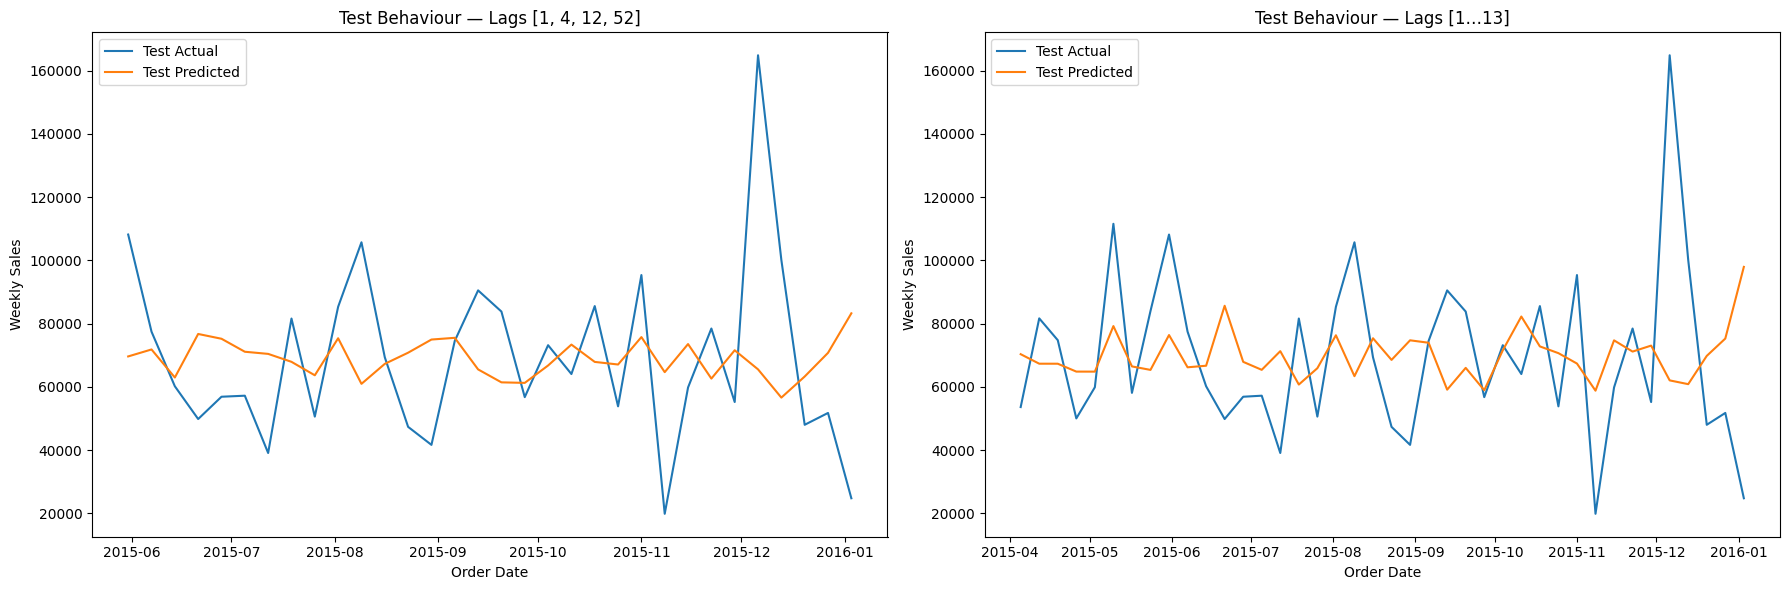

In [ ]:
# Comparison of Test set for both Dense and Spare lags

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ================================
# MODEL 1: Sparse lags [1,4,12,52]
# ================================
lags_sparse = [1, 4, 12, 52]
df_sparse = weekly_sales.copy()

for lag in lags_sparse:
    df_sparse[f"lag_{lag}"] = df_sparse["Sales"].shift(lag)

df_sparse = df_sparse.dropna().reset_index(drop=True)

X_sparse = df_sparse[[f"lag_{lag}" for lag in lags_sparse]]
y_sparse = df_sparse["Sales"]
dates_sparse = df_sparse["Order Date"]

split_sparse = int(len(df_sparse) * 0.8)

X_sparse_train = X_sparse.iloc[:split_sparse]
y_sparse_train = y_sparse.iloc[:split_sparse]
X_sparse_test  = X_sparse.iloc[split_sparse:]
y_sparse_test  = y_sparse.iloc[split_sparse:]
dates_sparse_test = dates_sparse.iloc[split_sparse:]

model_sparse = LinearRegression()
model_sparse.fit(X_sparse_train, y_sparse_train)
y_sparse_test_pred = model_sparse.predict(X_sparse_test)

# ================================
# MODEL 2: Dense lags [1…13]
# ================================
lags_dense = list(range(1, 14))
df_dense = weekly_sales.copy()

for lag in lags_dense:
    df_dense[f"lag_{lag}"] = df_dense["Sales"].shift(lag)

df_dense = df_dense.dropna().reset_index(drop=True)

X_dense = df_dense[[f"lag_{lag}" for lag in lags_dense]]
y_dense = df_dense["Sales"]
dates_dense = df_dense["Order Date"]

split_dense = int(len(df_dense) * 0.8)

X_dense_train = X_dense.iloc[:split_dense]
y_dense_train = y_dense.iloc[:split_dense]
X_dense_test  = X_dense.iloc[split_dense:]
y_dense_test  = y_dense.iloc[split_dense:]
dates_dense_test = dates_dense.iloc[split_dense:]

model_dense = LinearRegression()
model_dense.fit(X_dense_train, y_dense_train)
y_dense_test_pred = model_dense.predict(X_dense_test)

# ================================
# SIDE-BY-SIDE TEST PLOTS
# ================================
plt.figure(figsize=(18, 6))

# Left: Sparse lags
plt.subplot(1, 2, 1)
plt.plot(dates_sparse_test, y_sparse_test, label="Test Actual")
plt.plot(dates_sparse_test, y_sparse_test_pred, label="Test Predicted")
plt.title("Test Behaviour — Lags [1, 4, 12, 52]")
plt.xlabel("Order Date")
plt.ylabel("Weekly Sales")
plt.legend()

# Right: Dense lags
plt.subplot(1, 2, 2)
plt.plot(dates_dense_test, y_dense_test, label="Test Actual")
plt.plot(dates_dense_test, y_dense_test_pred, label="Test Predicted")
plt.title("Test Behaviour — Lags [1…13]")
plt.xlabel("Order Date")
plt.ylabel("Weekly Sales")
plt.legend()

plt.tight_layout()
plt.show()


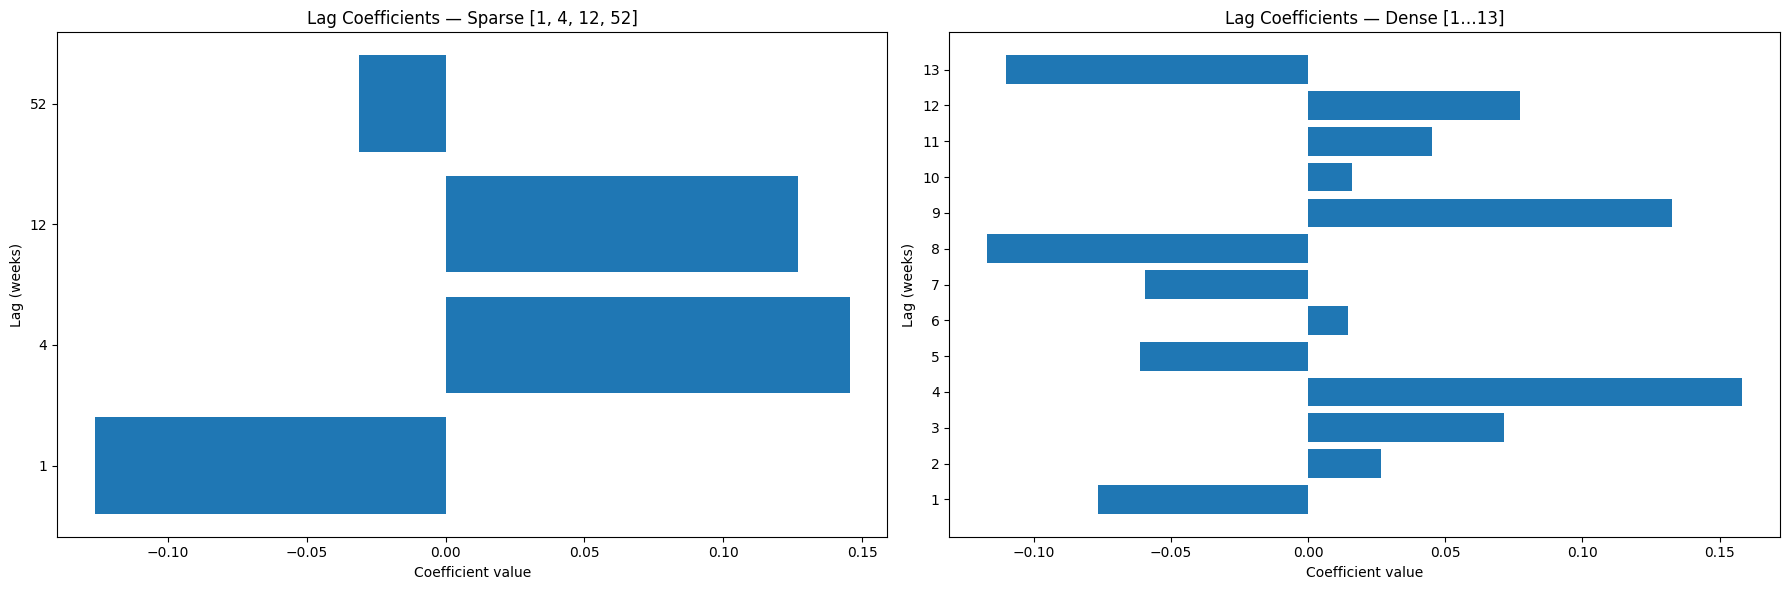

In [ ]:
# Review of Lag co-efficients

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ================================
# Sparse lags [1,4,12,52]
# ================================
lags_sparse = [1, 4, 12, 52]
df_sparse = weekly_sales.copy()

for lag in lags_sparse:
    df_sparse[f"lag_{lag}"] = df_sparse["Sales"].shift(lag)

df_sparse = df_sparse.dropna().reset_index(drop=True)

X_sparse = df_sparse[[f"lag_{lag}" for lag in lags_sparse]]
y_sparse = df_sparse["Sales"]

split_sparse = int(len(df_sparse) * 0.8)
X_sparse_train = X_sparse.iloc[:split_sparse]
y_sparse_train = y_sparse.iloc[:split_sparse]

model_sparse = LinearRegression()
model_sparse.fit(X_sparse_train, y_sparse_train)

coef_sparse = model_sparse.coef_

# ================================
# Dense lags [1…13]
# ================================
lags_dense = list(range(1, 14))
df_dense = weekly_sales.copy()

for lag in lags_dense:
    df_dense[f"lag_{lag}"] = df_dense["Sales"].shift(lag)

df_dense = df_dense.dropna().reset_index(drop=True)

X_dense = df_dense[[f"lag_{lag}" for lag in lags_dense]]
y_dense = df_dense["Sales"]

split_dense = int(len(df_dense) * 0.8)
X_dense_train = X_dense.iloc[:split_dense]
y_dense_train = y_dense.iloc[:split_dense]

model_dense = LinearRegression()
model_dense.fit(X_dense_train, y_dense_train)

coef_dense = model_dense.coef_

# ================================
# SIDE-BY-SIDE COEFFICIENT PLOTS
# ================================
plt.figure(figsize=(18, 6))

# Sparse coefficients
plt.subplot(1, 2, 1)
plt.barh([str(l) for l in lags_sparse], coef_sparse)
plt.title("Lag Coefficients — Sparse [1, 4, 12, 52]")
plt.xlabel("Coefficient value")
plt.ylabel("Lag (weeks)")

# Dense coefficients
plt.subplot(1, 2, 2)
plt.barh([str(l) for l in lags_dense], coef_dense)
plt.title("Lag Coefficients — Dense [1…13]")
plt.xlabel("Coefficient value")
plt.ylabel("Lag (weeks)")

plt.tight_layout()
plt.show()
